# Import Libraries

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop

# Read data

In [14]:
dataset = pd.read_csv('/content/drive/My Drive/BCML/ionosphere_data_kaggle.csv')
dataset.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


# Data Cleaning

In [15]:
# Cek data types
dataset.dtypes

feature1       int64
feature2       int64
feature3     float64
feature4     float64
feature5     float64
feature6     float64
feature7     float64
feature8     float64
feature9     float64
feature10    float64
feature11    float64
feature12    float64
feature13    float64
feature14    float64
feature15    float64
feature16    float64
feature17    float64
feature18    float64
feature19    float64
feature20    float64
feature21    float64
feature22    float64
feature23    float64
feature24    float64
feature25    float64
feature26    float64
feature27    float64
feature28    float64
feature29    float64
feature30    float64
feature31    float64
feature32    float64
feature33    float64
feature34    float64
label         object
dtype: object

In [16]:
# Melakukan label encoding pada output karena tipe data string
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dataset['label_cat'] = labelencoder.fit_transform(dataset['label'])
dataset.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label,label_cat
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g,1


In [17]:
# Drop kolom label string sebelumnya
dataset.drop(['label'], axis=1, inplace=True)
dataset.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label_cat
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


# Preprocessing

In [18]:
feature = dataset.drop(['label_cat'], axis=1)
label = dataset['label_cat']

In [34]:
# Scaling data dengan Power Transformer(yeo-johnson)
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures
scaler = PowerTransformer(method='yeo-johnson', standardize=True)

feature_scaled = scaler.fit_transform(feature.values)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [35]:
# Split data 80:20

from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label, test_size=0.20, random_state=10)

# Modeling

In [68]:
# Menggunakan 2 hidden layer dengan masing-masing 1024 neuron, activation relu dan output sigmoid
model = Sequential()
model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid')) # Layer output hanya 1 neuron karena output hanya 2 class

# Loss fuction menggunakan binary karena hanya 2 class(good,bad), Optimizer adam
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Batch size 8 dengan epoch 40
history = model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=40, batch_size=8)
model.summary()

Epoch 1/40
35/35 [==============================] - 0s 13ms/step - loss: 0.5648 - accuracy: 0.8107 - val_loss: 0.4844 - val_accuracy: 0.8451
Epoch 2/40
35/35 [==============================] - 0s 11ms/step - loss: 0.1446 - accuracy: 0.9393 - val_loss: 0.3655 - val_accuracy: 0.8732
Epoch 3/40
35/35 [==============================] - 0s 10ms/step - loss: 0.1214 - accuracy: 0.9571 - val_loss: 0.4508 - val_accuracy: 0.8310
Epoch 4/40
35/35 [==============================] - 0s 10ms/step - loss: 0.0884 - accuracy: 0.9714 - val_loss: 0.4908 - val_accuracy: 0.8873
Epoch 5/40
35/35 [==============================] - 0s 10ms/step - loss: 0.0800 - accuracy: 0.9750 - val_loss: 0.5400 - val_accuracy: 0.8592
Epoch 6/40
35/35 [==============================] - 0s 10ms/step - loss: 0.0346 - accuracy: 0.9821 - val_loss: 0.6718 - val_accuracy: 0.8451
Epoch 7/40
35/35 [==============================] - 0s 10ms/step - loss: 0.0465 - accuracy: 0.9714 - val_loss: 0.3020 - val_accuracy: 0.9014
Epoch 8/40
35

In [69]:
# Function untuk plot history
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [70]:
# Menampilkan val_loss terkecil dengan dataframe
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,accuracy,val_loss,val_accuracy,epoch
6,0.046536,0.971429,0.301997,0.901408,6
7,0.114113,0.967857,0.333107,0.873239,7
1,0.144644,0.939286,0.365528,0.873239,1
2,0.121433,0.957143,0.450834,0.830986,2
13,0.022124,0.989286,0.461420,0.887324,13
0,0.564808,0.810714,0.484388,0.845070,0
3,0.088441,0.971429,0.490770,0.887324,3
11,0.018638,0.992857,0.514799,0.859155,11
16,0.013696,0.992857,0.517316,0.873239,16
18,0.006749,1.000000,0.520257,0.873239,18


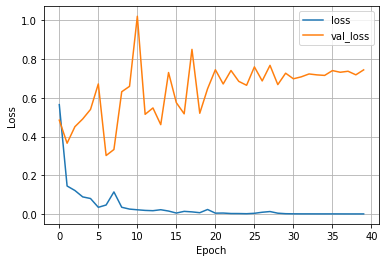

In [71]:
plot_loss(history)

# Hasil

Dari sorting value dataframe didapat val_loss terendah adalah pada epoch 6, dan sejalan dengan yang ditampilkan pada plot history dimana titik terendah mengarah pada epoch 6

Epoch : 6

Loss : 0.046536

Accuracy : 0.971429

Val_Loss :0.301997	

Val_Accuracy : 0.901408